### Reviews.txt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

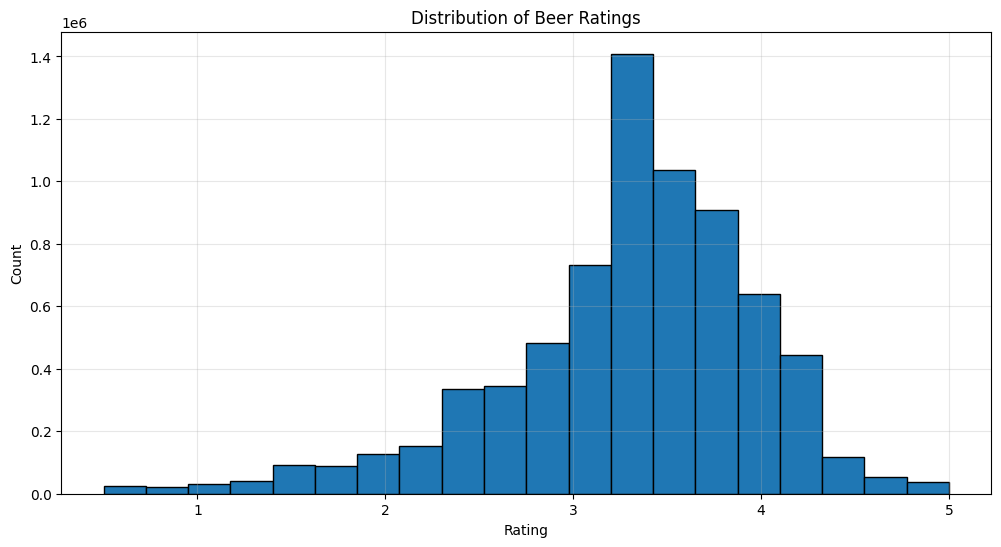

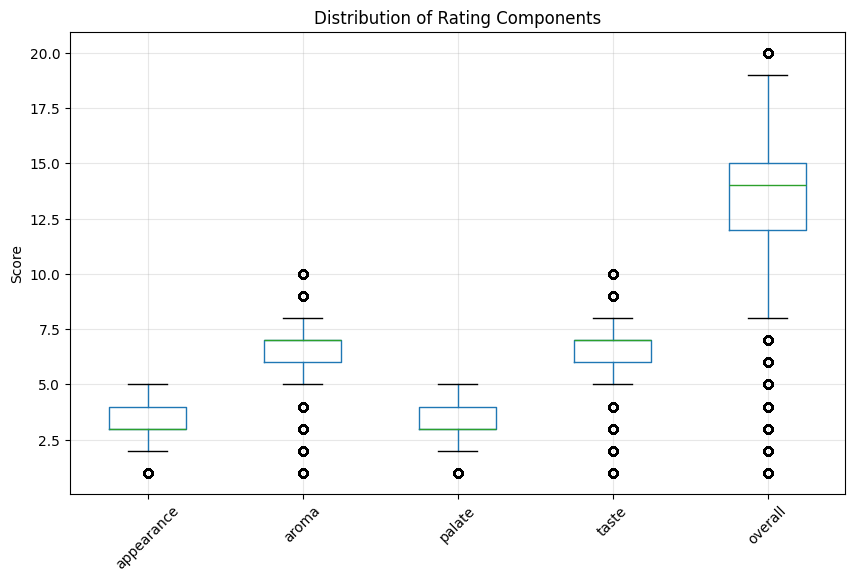

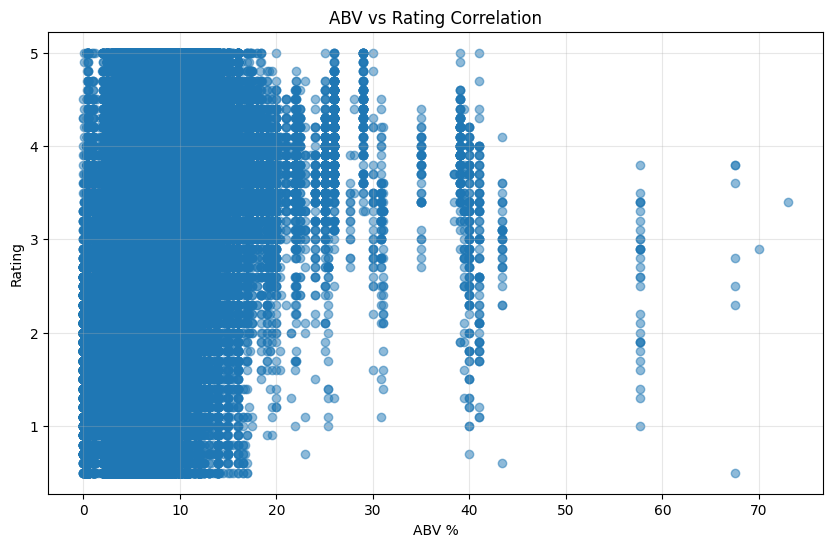

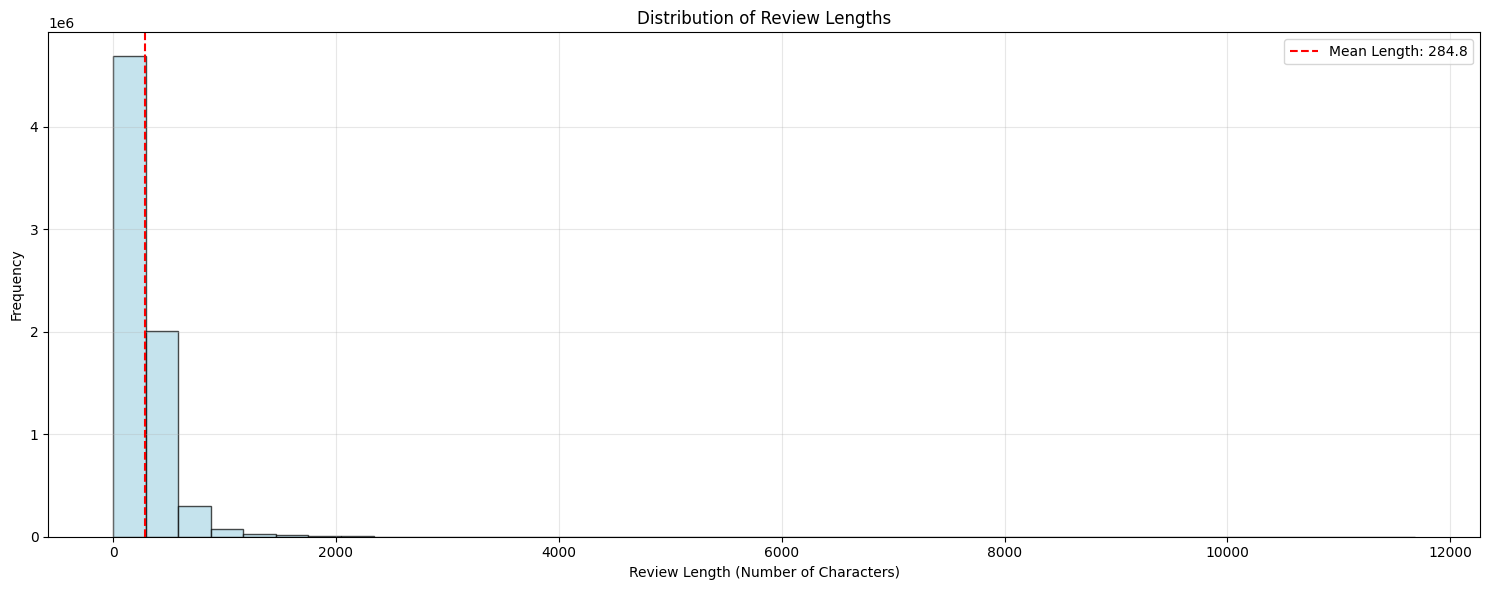


Review Length Statistics:
Mean Length: 284.83 characters
Median Length: 234.00 characters
Min Length: 1.0 characters
Max Length: 11682.0 characters
Standard Deviation: 198.37 characters

Beer Style Statistics:
                                 Number of Reviews  Average Rating  Rating Std Dev  Min Rating  Max Rating  Average ABV  Average Review Length
style                                                                                                                                         
Imperial Stout                              356738            3.85            0.46         0.5         5.0        10.31                 336.22
Abt/Quadrupel                                66277            3.84            0.53         0.5         5.0        10.57                 340.94
Lambic Style - Gueuze                        35360            3.78            0.58         0.5         5.0         5.97                 340.12
Imperial Porter                              48383            3.74        

In [2]:
def parse_review_file(file_path):
    reviews = []
    current_review = {}
    
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if line:
                if ': ' in line:
                    key, value = line.split(': ', 1)
                    try:
                        if key == 'date':
                            value = datetime.fromtimestamp(int(value))
                        elif key in ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating', 'abv']:
                            value = float(value)
                        else:
                            value = value
                    except (ValueError, TypeError):
                        value = value
                    current_review[key] = value
            else:
                if current_review:
                    reviews.append(current_review)
                    current_review = {}
    
    if current_review:
        reviews.append(current_review)
    
    return pd.DataFrame(reviews)

def create_analysis_plots(df):
    plt.style.use('default')
    
    # 1. Rating Distribution
    plt.figure(figsize=(12, 6))
    plt.hist(df['rating'], bins=20, edgecolor='black')
    plt.title('Distribution of Beer Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 2. Ratings Components Comparison
    ratings_components = ['appearance', 'aroma', 'palate', 'taste', 'overall']
    plt.figure(figsize=(10, 6))
    df[ratings_components].boxplot()
    plt.title('Distribution of Rating Components')
    plt.xticks(rotation=45)
    plt.ylabel('Score')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 3. ABV vs Rating Correlation
    plt.figure(figsize=(10, 6))
    plt.scatter(df['abv'], df['rating'], alpha=0.5)
    plt.title('ABV vs Rating Correlation')
    plt.xlabel('ABV %')
    plt.ylabel('Rating')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 4. Review Length Distribution
    if 'review_length' not in df.columns:
        df['review_length'] = df['text'].str.len()
    
    plt.figure(figsize=(15, 6))
    plt.hist(df['review_length'], 
            bins=40,
            color='lightblue',
            edgecolor='black',
            alpha=0.7)
    
    # Add mean line
    mean_length = df['review_length'].mean()
    plt.axvline(x=mean_length, color='red', linestyle='--', 
                label=f'Mean Length: {mean_length:.1f}')
    
    plt.title('Distribution of Review Lengths')
    plt.xlabel('Review Length (Number of Characters)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print("\nReview Length Statistics:")
    print(f"Mean Length: {df['review_length'].mean():.2f} characters")
    print(f"Median Length: {df['review_length'].median():.2f} characters")
    print(f"Min Length: {df['review_length'].min()} characters")
    print(f"Max Length: {df['review_length'].max()} characters")
    print(f"Standard Deviation: {df['review_length'].std():.2f} characters")

def create_style_lookup_table(df):
    # Add review length to dataframe
    df['review_length'] = df['text'].str.len()
    
    # Create detailed statistics for each beer style
    style_stats = df.groupby('style').agg({
        'rating': ['count', 'mean', 'std', 'min', 'max'],
        'abv': 'mean',
        'review_length': 'mean'
    }).round(2)
    
    # Flatten column names
    style_stats.columns = ['Number of Reviews', 'Average Rating', 'Rating Std Dev', 
                          'Min Rating', 'Max Rating', 'Average ABV', 
                          'Average Review Length']
    
    # Sort by average rating in descending order
    style_stats = style_stats.sort_values('Average Rating', ascending=False)
    
    print("\nBeer Style Statistics:")
    print("=====================")
    print(style_stats.to_string())
    
    return style_stats

def generate_summary_statistics(df):
    # Filter negative reviews (ratings <= 3)
    negative_reviews = df[df['rating'] <= 3]
    
    # Calculate basic statistics for negative reviews
    negative_stats = negative_reviews['rating'].describe()
    rating_counts = negative_reviews['rating'].value_counts().sort_index()
    
    # Comprehensive summary statistics
    stats = {
        'Total Reviews': len(df),
        'Average Rating': df['rating'].mean(),
        'Rating Std Dev': df['rating'].std(),
        'Unique Breweries': df['brewery_name'].nunique(),
        'Unique Styles': df['style'].nunique(),
        'Average ABV': df['abv'].mean(),
        'Most Common Style': df['style'].mode()[0],
        'Rating Range': f"{df['overall'].min():.2f} - {df['overall'].max():.2f}",
        'Most Reviewed Brewery': df['brewery_name'].mode()[0],
        'Number of Negative Reviews': len(negative_reviews),
        'Percentage of Negative Reviews': (len(negative_reviews) / len(df)) * 100
    }
    
    # Convert stats to pandas Series before returning
    return pd.Series(stats)

if __name__ == "__main__":
    # Read and process the data
    df = parse_review_file('./RateBeer/reviews/ratings.txt')
    create_analysis_plots(df)
    style_stats = create_style_lookup_table(df)
    
    # Generate summary statistics
    summary_stats = generate_summary_statistics(df)
    print("\nOverall Summary Statistics:")
    print("=========================")
    print(summary_stats.to_string())

- As an initial analysis step, it was crucial to plot a histogram representing the beer ratings distribution amongst the dataset in hand to gain some insights about the reviewers feedback patterns and to identify the degree of feasibility of our idea which consists of mainly focusing on negative reviews. Upon looking at the histogram, it is easy to identify that the distribution is left-skewed which means that positive reviews dominate and the peak of the reviews is located betwee 3.5-4.0 which may suggest that this dataset won't be enough to comply with our anslysis. However, after looking at the statistics of this dataset, it was determined that there are 211685 reviews with ratings ranging from 0 to 3 representing around 30% of the total reviews that we have which indicates that after cleaning the dataset "removing unvalid reviews" we will be still left with a rich dataset upon which we can easily build meaningful statistical analysis in terms of what people don't like and their main complaints. Moreover, the diversity of this rating spectrum, from 0 to 5, indicates a healthy review ecosystem where both positive and negative experiences are captured, making it a reliable source for comprehensive consumer sentiment analysis.

- Next the extraction of boxplots for each of the ratings that we have was crucial to uderstand how the ratings are dispered inside our dataset. As we can see, the ratings in each of the categories follow almost the same patterns. This consistency in distributions among aroma, palate, and taste, contrasted with the unique patterns in appearance and overall ratings, indicates that reviewers maintain distinct mental models for evaluating these aspects of beer quality. However, these patterns fall under very different ranges which can be used as an explanation for some mismatch between reviews and ratings. Also, the boxplot highlights the presence of some outlier reviews that may be interpreted as a miss-interpretation of the range or just some extreme ratings. This pre-analysis suggests that the most reliable and consistent value will stem from the rating column that should and any additional details needed will require special normalization of component scores to account for different scales to establish a fair comparison. 


- The scatter plot illustrates the relationship between beer ABV (Alcohol By Volume) percentage and ratings. The visualization shows a dense concentration of ratings between 0-20% ABV, with ratings spanning from 0 to 5. The data becomes notably sparse as ABV increases beyond 20%, with scattered data points extending up to 70% ABV. What's particularly interesting for the review analysis is the distribution pattern at lower ABV percentages (0-20%), where we see a complete spectrum of ratings from 0 to 5, indicating that beer strength alone doesn't determine rating quality. The vertical spread of ratings at common ABV levels (particularly 4-8%) shows that consumers provide both positive and negative feedback regardless of alcohol content. This suggests that negative reviews are likely based on factors beyond just alcohol content, such as taste, quality, or brewing technique. The plot also reveals some interesting outliers - beers with extremely high ABV (>40%) receive varied ratings, though the sample size is smaller. However, for negative reviews, it will be better to focus on the part of the dataset where the beer has an ABV < 20% as this is where the majority of negative reviews is concentrated.

- The final histogram displays the distribution of review lengths measured in number of characters, with a clear right-skewed pattern. The majority of reviews are concentrated in the shorter length range, with the highest frequency (approximately 4.5 million reviews) occurring between 0-500 characters, followed by a sharp decline. A second notable but smaller peak appears around 500-1000 characters (about 2 million reviews), with subsequent bars showing rapidly diminishing frequencies as review length increases. The red dashed line indicates the mean review length with a value of 284 characters. This distribution makes intuitive sense for beer reviews, as most consumers tend to write concise feedback focusing on key characteristics like taste, aroma, and overall impression, rather than lengthy detailed analyses. From a computational perspective, this distribution is advantageous - the predominance of shorter reviews means lower storage requirements and faster processing times for text analysis tasks. However, the presence of some very long reviews (extending beyond 10,000 characters) suggests that any text processing pipeline should be capable of handling occasional verbose reviews without breaking. The concentration of reviews in the shorter length ranges also indicates that text summarization or truncation might not be necessary for most reviews, making the dataset more manageable for large-scale analysis. This analysis also can help us in the cleaning process by disregarding reviews that are shorter than a specific length threshold to focus on more insightful reviews.

In [ ]:
def analyze_missing_data(df):
    # Calculate missing values
    missing_values = df.isnull().sum()
    total_rows = len(df)
    total_columns = len(df.columns)
    
    # Create DataFrame with missing value statistics
    missing_stats = pd.DataFrame({
        'Missing Count': missing_values,
        'Total Count': total_rows,
        'Missing Percentage': (missing_values / total_rows * 100).round(2)
    })
    
    # Filter only columns with missing values and sort by missing count
    missing_stats = missing_stats[missing_stats['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    
    # Calculate missing values per row
    missing_per_row = df.isnull().sum(axis=1)
    
    # Create distribution table with all possible counts
    all_possible_counts = range(total_columns + 1)
    value_counts = missing_per_row.value_counts()
    
    # Create distribution DataFrame with all possible counts
    distribution_table = pd.DataFrame(index=all_possible_counts, columns=['Count of Rows'])
    distribution_table['Count of Rows'] = 0  # Initialize all counts to 0
    
    # Fill in actual counts where they exist
    for count in value_counts.index:
        distribution_table.loc[count, 'Count of Rows'] = value_counts[count]
    
    # Sort index in descending order
    distribution_table = distribution_table.sort_index(ascending=False)
    
    # Add total columns row at the top
    distribution_table.loc['Total columns'] = total_columns
    new_index = ['Total columns'] + list(range(total_columns, -1, -1))
    distribution_table = distribution_table.reindex(new_index)
    
    if len(missing_stats) > 0:
        print("\nMissing Data Analysis:")
        print("=====================")
        print(missing_stats.to_string())
        
        print("\nSummary:")
        print("========")
        print(f"Total number of rows in dataset: {total_rows}")
        print(f"Total number of columns: {total_columns}")
        print(f"Number of columns with missing values: {len(missing_stats)}")
        print(f"Columns with complete data: {len(df.columns) - len(missing_stats)}")
        
        print("\nDistribution of Missing Values per Row:")
        print("===================================")
        print(distribution_table.to_string())
        
        # Identify rows with any missing values
        rows_with_missing = df[df.isnull().any(axis=1)]
        if len(rows_with_missing) > 0:
            print(f"\nDetailed Missing Value Analysis:")
            print("==============================")
            for index, row in rows_with_missing.iterrows():
                missing_cols = row[row.isnull()].index.tolist()
                print(f"Row {index}:")
                print(f"- Missing columns: {', '.join(missing_cols)}")
                print(f"- Number of missing values: {len(missing_cols)}")
                if 'beer_name' in row:
                    print(f"- Beer name: {row['beer_name']}")
                print()
            
            print(f"\nTotal rows with missing values: {len(rows_with_missing)}")
            print(f"Percentage of rows with missing values: {(len(rows_with_missing)/total_rows * 100):.2f}%")
    else:
        print("\nNo missing values found in the dataset!")
    
    return missing_stats, distribution_table

missing_stats, distribution_table = analyze_missing_data(df)

- This code helps in identifying missing values in our dataset which can later on help with the cleaning process of the data. As we can see, that the majority of missing data has the abv column with the most missing values which doesn't cause a problem to our main analysis.


User Review Analysis:
Total sum of all reviews combined: 7122074
Total number of unique users: 70167
Average reviews per user: 101.50
Maximum reviews by a single user: 43251
Minimum reviews by a single user: 1


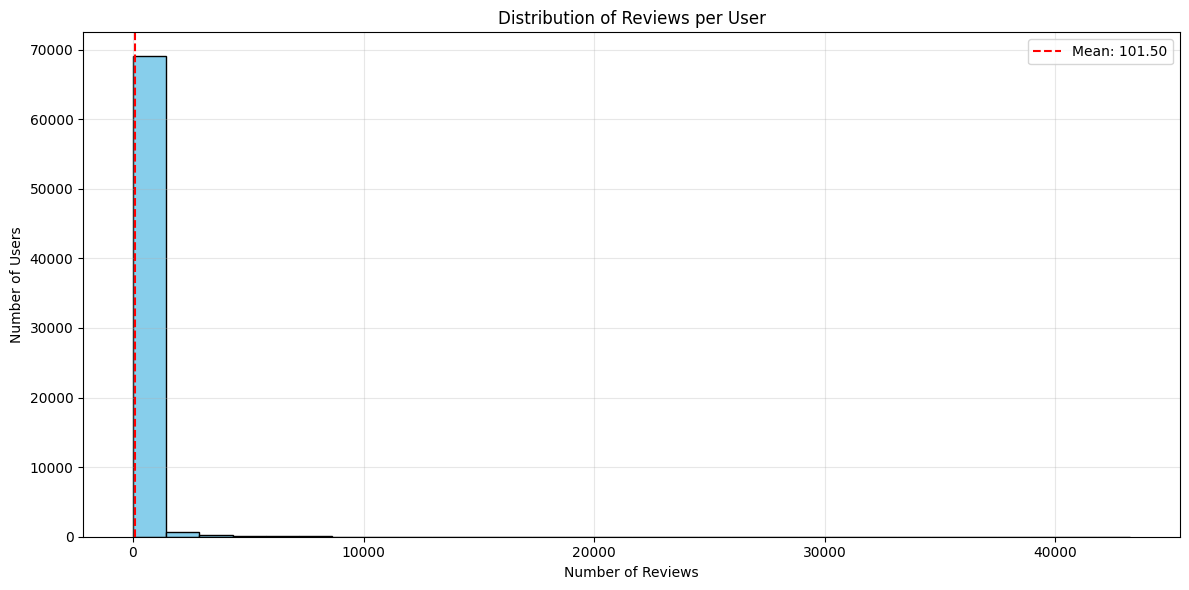


Top 10 Most Active Reviewers:
            Number of Reviews  Percentage of Total Reviews
user_name                                                 
fonefan                 43251                         0.61
yespr                   39240                         0.55
Ungstrup                32659                         0.46
joergen                 23526                         0.33
oh6gdx                  23417                         0.33
omhper                  22972                         0.32
anders37                22616                         0.32
Papsoe                  22021                         0.31
Travlr                  21650                         0.30
madmitch76              21030                         0.30

Review Count Distribution:
Reviews    Number of Users
--------   --------------
1          28149
2          9223
3          5077
4          3166
5          2196
6          1727
7          1361
8          1103
9          1024
10         889
11         730
12   

In [4]:
def analyze_user_reviews(df):
    # Count reviews per user
    user_reviews = df['user_name'].value_counts()
    
    # Create a DataFrame with the counts
    user_stats = pd.DataFrame({
        'Number of Reviews': user_reviews
    })
    
    # Add percentage of total reviews
    total_reviews = len(df)
    user_stats['Percentage of Total Reviews'] = (user_stats['Number of Reviews'] / total_reviews * 100).round(2)
    
    # Print summary statistics
    print("\nUser Review Analysis:")
    print("===================")
    print(f"Total sum of all reviews combined: {total_reviews}")
    print(f"Total number of unique users: {len(user_stats)}")
    print(f"Average reviews per user: {(total_reviews/len(user_stats)):.2f}")
    print(f"Maximum reviews by a single user: {user_stats['Number of Reviews'].max()}")
    print(f"Minimum reviews by a single user: {user_stats['Number of Reviews'].min()}")
    
    # Plot histogram of review distribution
    plt.figure(figsize=(12, 6))
    plt.hist(user_stats['Number of Reviews'], bins=30, edgecolor='black', color='skyblue')
    plt.title('Distribution of Reviews per User')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Number of Users')
    plt.grid(True, alpha=0.3)
    
    # Add mean line
    mean_reviews = user_stats['Number of Reviews'].mean()
    plt.axvline(x=mean_reviews, color='red', linestyle='--', 
                label=f'Mean: {mean_reviews:.2f}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print top 10 most active reviewers
    print("\nTop 10 Most Active Reviewers:")
    print("==========================")
    print(user_stats.head(10).to_string())
    
    # Create review frequency distribution table
    review_freq = user_stats['Number of Reviews'].value_counts().sort_index()
    
    print("\nReview Count Distribution:")
    print("=======================")
    print("Reviews    Number of Users")
    print("--------   --------------")
    for reviews, users in review_freq.items():
        print(f"{reviews:<10} {users}")
    
    # Create new DataFrame with user details and number of reviews
    user_reviews_df = df.groupby(['user_name', 'user_id']).size().reset_index()
    user_reviews_df.columns = ['user_name', 'user_id', 'nbr_reviews']
    
    # Sort by number of reviews in descending order
    user_reviews_df = user_reviews_df.sort_values('nbr_reviews', ascending=False)
    
    # Export to CSV
    user_reviews_df.to_csv('user_reviews_summary.csv', index=False)
    print("\nUser reviews summary has been exported to 'user_reviews_summary.csv'")
    
    return user_stats, user_reviews_df


user_statistics, user_reviews_df = analyze_user_reviews(df)



User Review Analysis (Excluding Empty Reviews):
Original number of reviews: 7122074
Reviews removed due to missing text: 448
Clean reviews in dataset: 7121626
Total sum of all reviews: 7121626
Total number of unique users: 70149
Average reviews per user: 101.52
Maximum reviews by a single user: 43251
Minimum reviews by a single user: 1


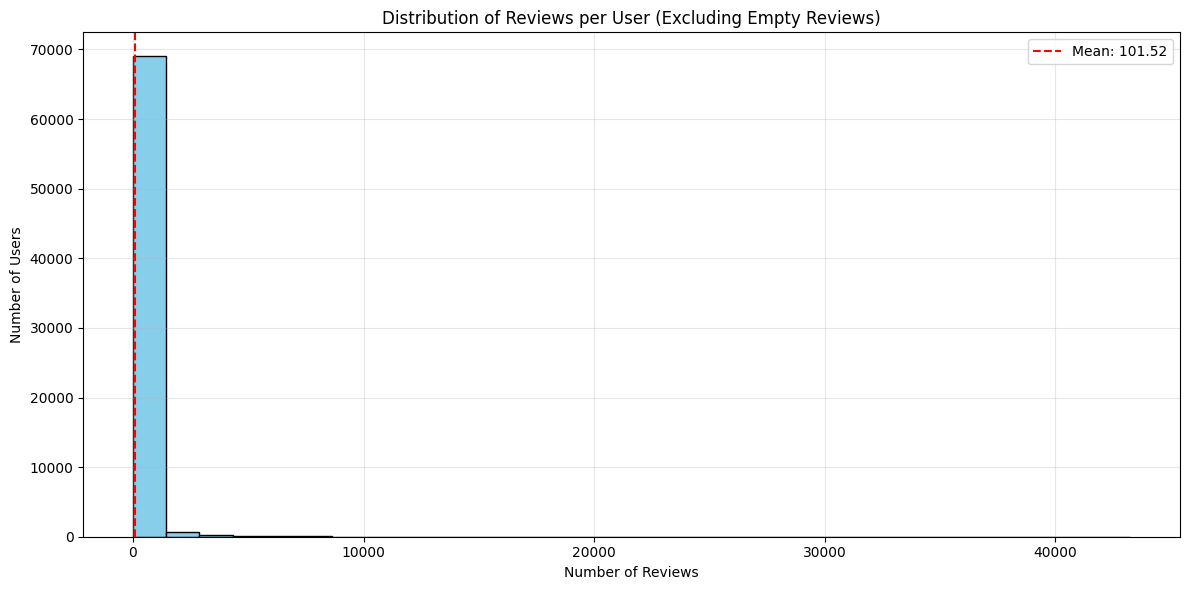


Top 10 Most Active Reviewers:
            Number of Reviews  Percentage of Total Reviews
user_name                                                 
fonefan                 43251                         0.61
yespr                   39240                         0.55
Ungstrup                32659                         0.46
joergen                 23526                         0.33
oh6gdx                  23417                         0.33
omhper                  22972                         0.32
anders37                22616                         0.32
Papsoe                  22021                         0.31
Travlr                  21650                         0.30
madmitch76              21030                         0.30

Review Count Distribution:
Reviews    Number of Users
--------   --------------
1          28144
2          9220
3          5073
4          3166
5          2195
6          1726
7          1361
8          1104
9          1024
10         888
11         730
12   

In [5]:
def analyze_user_reviews(df):
    # Remove rows where 'text' is missing or empty
    df_clean = df[df['text'].notna() & (df['text'].str.strip() != '')]
    
    # Count reviews per user
    user_reviews = df_clean['user_name'].value_counts()
    
    # Create a DataFrame with the counts
    user_stats = pd.DataFrame({
        'Number of Reviews': user_reviews
    })
    
    # Calculate total reviews from the cleaned data
    total_reviews = user_stats['Number of Reviews'].sum()  # This gives us the actual sum of all reviews
    
    # Add percentage of total reviews
    user_stats['Percentage of Total Reviews'] = (user_stats['Number of Reviews'] / total_reviews * 100).round(2)
    
    # Print summary statistics
    print("\nUser Review Analysis (Excluding Empty Reviews):")
    print("=========================================")
    print(f"Original number of reviews: {len(df)}")
    print(f"Reviews removed due to missing text: {len(df) - len(df_clean)}")
    print(f"Clean reviews in dataset: {len(df_clean)}")
    print(f"Total sum of all reviews: {total_reviews}")  # This will show the actual sum
    print(f"Total number of unique users: {len(user_stats)}")
    print(f"Average reviews per user: {(total_reviews/len(user_stats)):.2f}")
    print(f"Maximum reviews by a single user: {user_stats['Number of Reviews'].max()}")
    print(f"Minimum reviews by a single user: {user_stats['Number of Reviews'].min()}")
    
    # Rest of the code remains the same...
    plt.figure(figsize=(12, 6))
    plt.hist(user_stats['Number of Reviews'], bins=30, edgecolor='black', color='skyblue')
    plt.title('Distribution of Reviews per User (Excluding Empty Reviews)')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Number of Users')
    plt.grid(True, alpha=0.3)
    
    # Add mean line
    mean_reviews = user_stats['Number of Reviews'].mean()
    plt.axvline(x=mean_reviews, color='red', linestyle='--', 
                label=f'Mean: {mean_reviews:.2f}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print top 10 most active reviewers
    print("\nTop 10 Most Active Reviewers:")
    print("==========================")
    print(user_stats.head(10).to_string())
    
    # Create review frequency distribution table
    review_freq = user_stats['Number of Reviews'].value_counts().sort_index()
    
    print("\nReview Count Distribution:")
    print("=======================")
    print("Reviews    Number of Users")
    print("--------   --------------")
    for reviews, users in review_freq.items():
        print(f"{reviews:<10} {users}")
    
    # Create new DataFrame with user details and number of reviews
    user_reviews_df = df_clean.groupby(['user_name', 'user_id']).size().reset_index()
    user_reviews_df.columns = ['user_name', 'user_id', 'nbr_reviews']
    
    # Sort by number of reviews in descending order
    user_reviews_df = user_reviews_df.sort_values('nbr_reviews', ascending=False)
    
    # Export to CSV
    user_reviews_df.to_csv('user_reviews_summary.csv', index=False)
    print("\nClean user reviews summary has been exported to 'user_reviews_summary.csv'")
    
    return user_stats, user_reviews_df

user_statistics, user_reviews_df = analyze_user_reviews(df)

In [6]:
df_reviews = pd.read_csv('user_reviews_summary.csv')
df_reviews['nbr_reviews'].sum()

np.int64(7121626)


Beer Review Analysis (Excluding Empty Reviews):
Original number of reviews: 7122074
Reviews removed due to missing text: 448
Clean reviews in dataset: 7121626
Total sum of all reviews: 7121626
Total number of unique beers: 396449
Average reviews per beer: 17.96
Maximum reviews for a single beer: 5270
Minimum reviews for a single beer: 1


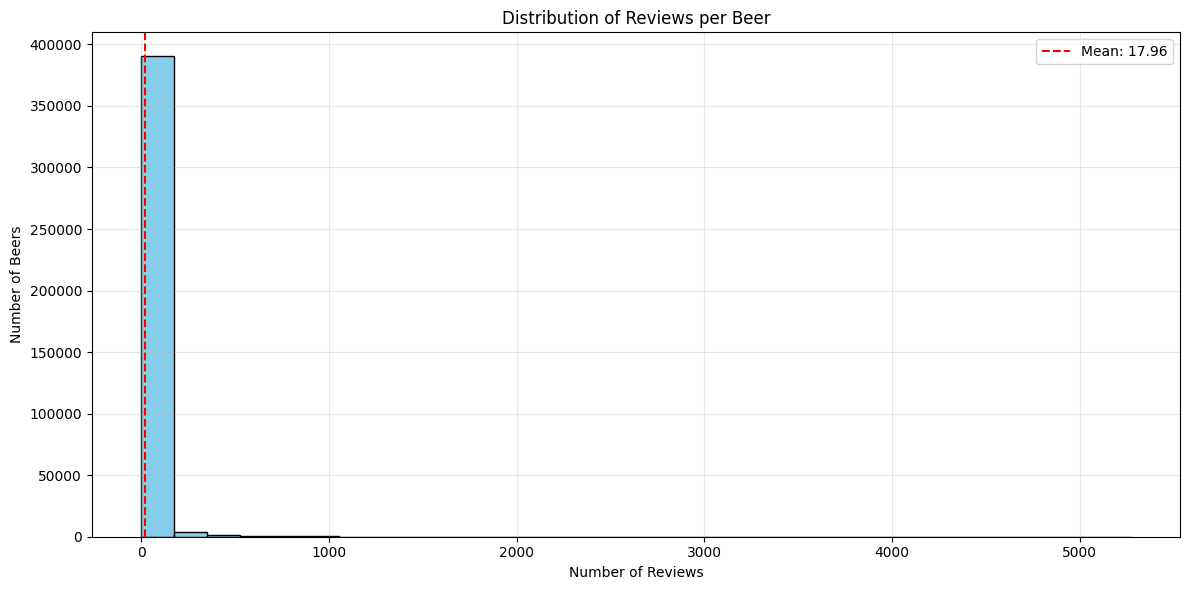


Top 10 Most Reviewed Beers:
                                                 Number of Reviews  Percentage of Total Reviews
beer_name                                                                                      
Rochefort Trappistes 10                                       5270                         0.07
Guinness Draught                                              5182                         0.07
Chimay Bleue (Blue) / Grande Réserve                          4841                         0.07
Orval                                                         4486                         0.06
St. Bernardus Abt 12                                          4477                         0.06
Duvel                                                         4447                         0.06
Arrogant Bastard Ale                                          4268                         0.06
North Coast Old Rasputin Russian Imperial Stout               4229                         0.06
Hoegaarden 

In [7]:
def analyze_beer_reviews(df):
    # Remove rows where 'text' is missing or empty
    df_clean = df[df['text'].notna() & (df['text'].str.strip() != '')]
    
    # Count reviews per beer
    beer_reviews = df_clean['beer_name'].value_counts()
    
    # Create a DataFrame with the counts
    beer_stats = pd.DataFrame({
        'Number of Reviews': beer_reviews
    })
    
    # Calculate total reviews from the cleaned data
    total_reviews = beer_stats['Number of Reviews'].sum()
    
    # Add percentage of total reviews
    beer_stats['Percentage of Total Reviews'] = (beer_stats['Number of Reviews'] / total_reviews * 100).round(2)
    
    # Print summary statistics
    print("\nBeer Review Analysis (Excluding Empty Reviews):")
    print("=========================================")
    print(f"Original number of reviews: {len(df)}")
    print(f"Reviews removed due to missing text: {len(df) - len(df_clean)}")
    print(f"Clean reviews in dataset: {len(df_clean)}")
    print(f"Total sum of all reviews: {total_reviews}")
    print(f"Total number of unique beers: {len(beer_stats)}")
    print(f"Average reviews per beer: {(total_reviews/len(beer_stats)):.2f}")
    print(f"Maximum reviews for a single beer: {beer_stats['Number of Reviews'].max()}")
    print(f"Minimum reviews for a single beer: {beer_stats['Number of Reviews'].min()}")
    
    # Plot histogram of review distribution
    plt.figure(figsize=(12, 6))
    plt.hist(beer_stats['Number of Reviews'], bins=30, edgecolor='black', color='skyblue')
    plt.title('Distribution of Reviews per Beer')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Number of Beers')
    plt.grid(True, alpha=0.3)
    
    # Add mean line
    mean_reviews = beer_stats['Number of Reviews'].mean()
    plt.axvline(x=mean_reviews, color='red', linestyle='--', 
                label=f'Mean: {mean_reviews:.2f}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print top 10 most reviewed beers
    print("\nTop 10 Most Reviewed Beers:")
    print("==========================")
    print(beer_stats.head(10).to_string())
    
    # Create review frequency distribution table
    review_freq = beer_stats['Number of Reviews'].value_counts().sort_index()
    
    print("\nReview Count Distribution:")
    print("=======================")
    print("Reviews    Number of Beers")
    print("--------   --------------")
    for reviews, beers in review_freq.items():
        print(f"{reviews:<10} {beers}")
    
    # Create new DataFrame with beer details and number of reviews
    beer_reviews_df = df_clean.groupby(['beer_name', 'beer_id', 'brewery_name']).size().reset_index()
    beer_reviews_df.columns = ['beer_name', 'beer_id', 'brewery_name', 'nbr_reviews']
    
    # Sort by number of reviews in descending order
    beer_reviews_df = beer_reviews_df.sort_values('nbr_reviews', ascending=False)
    
    # Export to CSV
    beer_reviews_df.to_csv('beer_reviews_summary.csv', index=False)
    print("\nBeer reviews summary has been exported to 'beer_reviews_summary.csv'")
    
    return beer_stats, beer_reviews_df

beer_statistics, beer_reviews_df = analyze_beer_reviews(df)

In [ ]:
df_beer_reviews = pd.read_csv('beer_reviews_summary.csv')
df_beer_reviews['nbr_reviews'].sum()

In [9]:
def analyze_beer_reviews(df):
    # Remove rows where 'text' is missing or empty
    df_clean = df[df['text'].notna() & (df['text'].str.strip() != '')]
    
    # Create new DataFrame with only beer details and number of reviews
    beer_reviews_df = df_clean.groupby(['beer_name', 'beer_id']).size().reset_index()
    beer_reviews_df.columns = ['beer_name', 'beer_id', 'nbr_reviews']
    
    # Sort by number of reviews in descending order
    beer_reviews_df = beer_reviews_df.sort_values('nbr_reviews', ascending=False)
    
    # Export to CSV with only the requested columns
    beer_reviews_df.to_csv('beer_reviews_summary.csv', index=False)
    print("\nBeer reviews summary has been exported to 'beer_reviews_summary.csv'")
    
    return beer_reviews_df

beer_reviews_df = analyze_beer_reviews(df)


Beer reviews summary has been exported to 'beer_reviews_summary.csv'
